<a href="https://colab.research.google.com/github/Pusse-01/ID-Card-verification/blob/main/CNN_AI_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner


     |████████████████████████████████| 97 kB 4.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
import keras_tuner
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [ ]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/training/old_front/Myf - Shyamini Rajika.jpg")

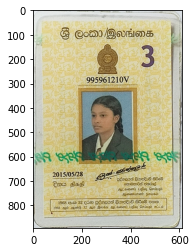

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/CNN Model/images/training/old_front/Myf - Shyamini Rajika.jpg").shape

(892, 609, 3)

In [ ]:
#training = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1./255)

training = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    #width_shift_range=.2,
    #height_shift_range=.2,
    shear_range=.2,
    #stateless_random_brightness=.95,
    #zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )




In [ ]:
train_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/training/',
                                    target_size=(150,150),
                                    batch_size = 3,
                                    class_mode = 'sparse')

validation_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/validation/',
                                    target_size=(150,150),
                                    batch_size = 3,
                                    class_mode = 'sparse')
test_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/testing',
                                    target_size=(150,150),
                                    batch_size = 3,
                                    class_mode = 'sparse')



Found 141 images belonging to 4 classes.
Found 18 images belonging to 4 classes.
Found 9 images belonging to 4 classes.


In [ ]:
target_names = []

for key in train_dataset.class_indices:

    target_names.append(key)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])



In [ ]:
#model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   ## tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   #
                                    #tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  # tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   #tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                  # tf.keras.layers.Flatten(),
                                   ##
                                  # tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                  # tf.keras.layers.Dense(1,activation='softmax'),
                                   #])


def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=512, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(150,150,3)
    ),
    keras.layers.MaxPool2D(2,2),
    #
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=256, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPool2D(2,2),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4,activation='softmax'),
  ])
  
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.engine.hypermodel import HyperModel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=6,
                         )

In [ ]:
tuner_search.search(train_dataset,epochs=5,validation_data=validation_dataset)
best_model = tuner_search.get_best_models()[0]

Trial 6 Complete [00h 01m 37s]
val_accuracy: 0.4444444477558136

Best val_accuracy So Far: 0.8333333134651184
Total elapsed time: 00h 12m 39s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 176)     4928      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 176)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        101440    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                7962720   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 3

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/CNN Model/test models/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=best_model.fit(train_dataset,
                       steps_per_epoch=20,
                       epochs=60,
                       callbacks=[checkpoint],
                       validation_data=validation_dataset)

Epoch 1/60
20/20 [==============================] - 10s 457ms/step - loss: 0.7603 - accuracy: 0.7167 - val_loss: 0.5146 - val_accuracy: 0.7778
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN Model/test models/model-001.model/assets
Epoch 2/60
20/20 [==============================] - 8s 403ms/step - loss: 0.7248 - accuracy: 0.7667 - val_loss: 0.5825 - val_accuracy: 0.8333
Epoch 3/60
20/20 [==============================] - 9s 469ms/step - loss: 0.7627 - accuracy: 0.6833 - val_loss: 0.5576 - val_accuracy: 0.8333
Epoch 4/60
20/20 [==============================] - 8s 405ms/step - loss: 0.7011 - accuracy: 0.8000 - val_loss: 0.4833 - val_accuracy: 0.8889
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN Model/test models/model-004.model/assets
Epoch 5/60
20/20 [==============================] - 9s 470ms/step - loss: 0.5249 - accuracy: 0.8500 - val_loss: 0.6405 - val_accuracy: 0.8333
Epoch 6/60
20/20 [==============================] - 9s 450ms/step - loss: 0.6578 - 

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/CNN Model/test models/model-050.model')

In [ ]:
loss, acc = model.evaluate(test_dataset)
print("Accuracy", acc)

3/3 [==============================] - 1s 307ms/step - loss: 0.1586 - accuracy: 1.0000
Accuracy 1.0


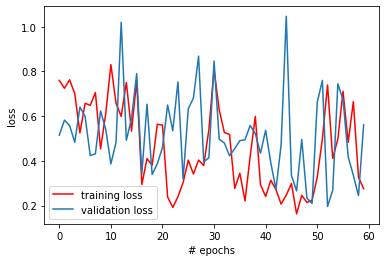

In [45]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

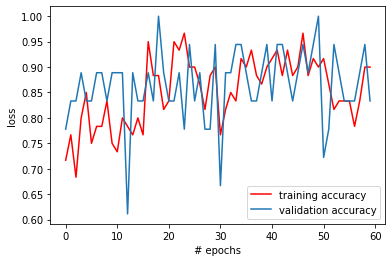

In [46]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Confusion Matrix

In [47]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [48]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))


    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()


    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)


    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


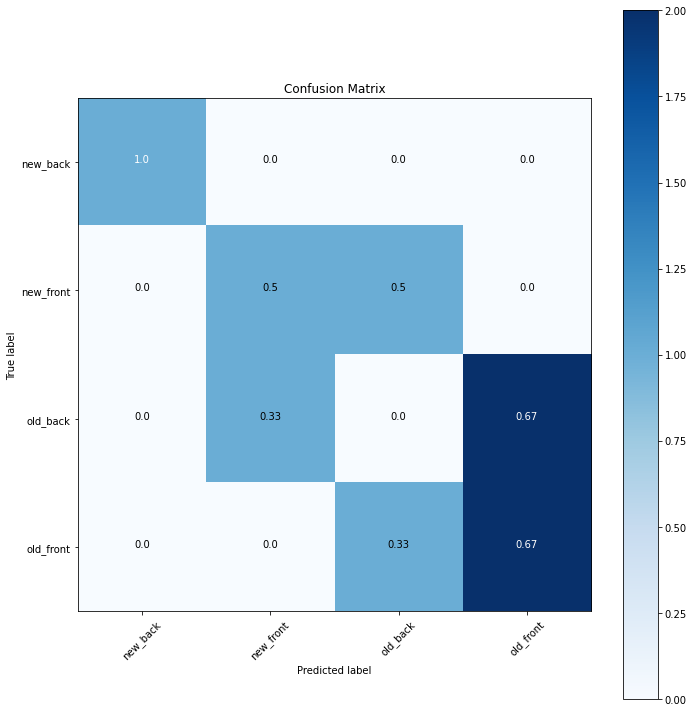

In [56]:
Y_pred = model.predict_generator(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_dataset.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')



In [57]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

print('Sensitivity: ',TN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('Specificity: ',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

Sensitivity:  [8. 6. 4. 4.]
Specificity:  [1.         0.85714286 0.66666667 0.66666667]


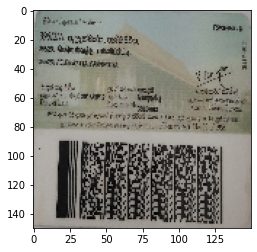

New Back


In [59]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/testing/new_back/20210819_203036 - Esha Keshari.jpg",
                    target_size=(150,150))
plt.imshow(img)
plt.show()
    
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val= np.argmax(model.predict(images))

if val == 0:
    print("New Back")
elif val == 1:
    print("New Front")
elif val == 2:
    print("Old Back")
else :
    print("Old Front")

Save and load

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format


In [ ]:
model.save('/content/drive/MyDrive/CNN Model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/CNN Model.h5')

In [ ]:
new_model.summary()

In [ ]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/testing/old_front/old_front_4.jpg",
                    target_size=(200,200))
plt.imshow(img)
plt.show()
    
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val= val= np.argmax(best_model.predict(images))
print (val)
if val == 0:
    print("new back")
elif val == 1:
    print("new front")
elif val == 2:
    print("old back")
else :
    print("old front")

In [ ]:
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.plot(model_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
